# Visualising data
#### following clustering and annotation (2024-11-12_Nikita-Clean_Clustering.jpynb) now visualising data

# Set up workspace:

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

Print software versions:

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


``` bash
rsync -azvhP /QRISdata/Q5935/nikita/scdata/Python_Objects_Backup_20250527/Myeloid_Objects/NRclean_clustered2.h5ad /scratch/user/s4436039/scdata/Myeloid_Objects
```


In [3]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [4]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

In [5]:
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects/Manuscript_figures_20250722')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects/Manuscript_figures_20250722'

# add simple annotations, (only had to be run the first time, now saved in to object):

In [ ]:
#make simple annotations
data.obs["NR_annotations_simple"] = data.obs["clean-subcluster-v2"].map(
    {
        "0": "Tissue resident macrophage",
        "1": "Tissue resident macrophage",
        "2": "Classical monocytes",
        "3": "Tissue resident macrophage",
        "4": "Tissue resident macrophage",
        "5": "Tissue resident macrophage",
        "6": "non-classical monocytes",
        "7,0": "cDC2",
        "7,1": "Tissue resident macrophage",
        "7,2": "cDC2",
        "8": "Tissue resident macrophage",
        "9": "Tissue resident macrophage",
        "10": "Tissue resident macrophage",
        "11": "Tissue resident macrophage",
        "12,0": "cDC1",
        "12,1": "cDC1",
        "12,2": "cDC1",
        "13": "KI-67+ Tissue resident macrophage",
        "14": "KI-67+ Tissue resident macrophage",
        "15": "mregDC",
        "17": "Tissue resident macrophage",
        "18": "Tissue resident macrophage"
    }
)

In [ ]:
# check 
print(data.obs['NR_annotations_simple'].value_counts())

NR_annotations_simple
Tissue resident macrophage           368421
Classical monocytes                   57086
non-classical monocytes               29255
cDC2                                  17391
KI-67+ Tissue resident macrophage     13020
cDC1                                   6730
mregDC                                 6120
Name: count, dtype: int64


In [ ]:
#make simpler annotations
data.obs["MyeloidAPC_Subsets"] = data.obs["NR_annotations_simple"].map(
    {
        "Tissue resident macrophage": "Tissue resident macrophage",
        "Classical monocytes": "Classical monocytes",
        "non-classical monocytes": "non-classical monocytes",
        "cDC2": "cDC2",
        "cDC1": "cDC1",
        "KI-67+ Tissue resident macrophage": "Tissue resident macrophage",
        "mregDC": "mregDC",
    }
)

In [ ]:
# check 
print(data.obs['MyeloidAPC_Subsets'].value_counts())

MyeloidAPC_Subsets
Tissue resident macrophage    381441
Classical monocytes            57086
non-classical monocytes        29255
cDC2                           17391
cDC1                            6730
mregDC                          6120
Name: count, dtype: int64


In [ ]:
#save object
data.write_h5ad("NRclean_clustered2.h5ad", compression="gzip")

### make metadata where local recurrence is in with primary tumour 

In [ ]:
#group local recurrence with primary tumours
data.obs["sample_type_major2"] = data.obs["sample_type_major"]

In [ ]:
#make a copy 
local = data[data.obs["sample_type_major"].isin(["local recurrence"])]

In [ ]:
#set to primary tumour
local.obs["sample_type_major2"] = "primary tumour"

In [ ]:
#update  
data.obs["sample_type_major2"].update(local.obs["sample_type_major2"]) 

In [ ]:
# check 
type_counts = data.obs['sample_type_major2'].value_counts()
print(type_counts)

sample_type_major2
primary tumour       273023
metastatic tumour    127339
healthy               63409
ascites               34252
local recurrence          0
Name: count, dtype: int64


In [18]:
data2 = data[~data.obs["sample_type_major2"].isin(["local recurrence"])]

In [21]:
# check exclude_annots
type_counts = data2.obs['sample_type_major2'].value_counts()
print(type_counts)

sample_type_major2
primary tumour       273023
metastatic tumour    127339
healthy               63409
ascites               34252
Name: count, dtype: int64


In [23]:
# check exclude_annots
type_counts = data2.obs['sample_type_major'].value_counts()
print(type_counts)

sample_type_major
primary tumour       266684
metastatic tumour    127339
healthy               63409
ascites               34252
local recurrence       6339
Name: count, dtype: int64


In [22]:
#save object
data2.write_h5ad("NRclean_clustered.h5ad", compression="gzip")

# add metadata for healthy assoicated cancer 

In [ ]:
# check 
H_counts = data.obs['sample_type_major2'].value_counts()
print(H_counts)

sample_type_major2
primary tumour       273023
metastatic tumour    127339
healthy               63409
ascites               34252
Name: count, dtype: int64


In [ ]:
data.obs['cancer_with_H'] = data.obs['cancer_type_broad']

In [13]:
#subset out the healthy samples
healthy = data[data.obs["sample_type_major2"] == "healthy"]

In [ ]:
# check 
H_counts = healthy.obs['dataset_id'].value_counts()
print(H_counts)

dataset_id
GSE154826       39625
GSE131907       15383
GSE189903        3389
GSE184880        1249
PRJNA907381      1082
GSE162498         948
PMID32561858      926
GSE161529         778
GSE195861          29
Name: count, dtype: int64


In [ ]:
# check 
H_counts = healthy.obs['cancer_with_H'].value_counts()
print(H_counts)

cancer_with_H
NA    63409
Name: count, dtype: int64


In [17]:
#make a new column called cancer_with_H that is a copy of cancer_type_broad, where I will update all the NA's to associated cancer
healthy.obs["cancer_with_H"] = healthy.obs["dataset_id"].map(
    {
        "GSE154826": "NSCLC",
        "GSE131907": "NSCLC",
        "GSE189903": "LIVER",
        "GSE184880": "HGSOC",
        "PRJNA907381": "Melanoma",
        "GSE162498": "NSCLC",
        "PMID32561858": "CRC",
        "GSE161529": "Breast Cancer",
        "GSE195861": "Breast Cancer"
    }
)

/scratch/temp/11595184/ipykernel_3345620/1007934548.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [18]:
#subset out the healthy samples
liver = healthy[healthy.obs["cancer_with_H"] == "LIVER"]

In [ ]:
# check 
H_counts = liver.obs['sample_id'].value_counts()
print(H_counts)

sample_id
GSE189903_HCC_Pt4H_normal     1504
GSE189903_HCC_Pt1H_normal     1475
GSE189903_HCC_Pt3H_normal      300
GSE189903_iCCA_Pt3C_normal     110
Name: count, dtype: int64


In [24]:
#update cancer_with_H
liver.obs["cancer_with_H"] = liver.obs["sample_id"].map(
    {
        "GSE189903_HCC_Pt4H_normal": "HCC",
        "GSE189903_HCC_Pt1H_normal": "HCC",
        "GSE189903_HCC_Pt3H_normal": "HCC",
        "GSE189903_iCCA_Pt3C_normal": "iCCA"
    }
)

/scratch/temp/11595184/ipykernel_3345620/462740843.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [25]:
#update healthy
healthy.obs["cancer_with_H"].update(liver.obs["cancer_with_H"]) 

/scratch/temp/11595184/ipykernel_3345620/302568896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [ ]:
# check 
H_counts = healthy.obs['cancer_with_H'].value_counts()
print(H_counts)

cancer_with_H
NSCLC            55956
HCC               3279
HGSOC             1249
Melanoma          1082
CRC                926
Breast Cancer      807
iCCA               110
Name: count, dtype: int64


In [27]:
#update data
data.obs["cancer_with_H"].update(healthy.obs["cancer_with_H"]) 

/scratch/temp/11595184/ipykernel_3345620/1537585623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [29]:
# check 
H_counts = data.obs['cancer_with_H'].value_counts()
print(H_counts)

cancer_with_H
HGSOC             213319
NSCLC             110844
HNSCC              52659
GBM                34224
Breast Cancer      32630
HCC                15298
PDAC               14061
Melanoma           11624
CRC                 4805
iCCA                3576
GAC                 2894
NPC                 1610
Acral Melanoma       479
NA                     0
Name: count, dtype: int64


In [30]:
# check 
H_counts = data.obs['cancer_type_broad'].value_counts()
print(H_counts)

cancer_type_broad
HGSOC             212070
NA                 63409
NSCLC              54888
HNSCC              52659
GBM                34224
Breast Cancer      31823
PDAC               14061
HCC                12019
Melanoma           10542
CRC                 3879
iCCA                3466
GAC                 2894
NPC                 1610
Acral Melanoma       479
Name: count, dtype: int64


In [16]:
#save object
data.write_h5ad("NRclean_clustered2.h5ad", compression="gzip")

# Visualise UMAP
* and split by cluster

In [ ]:
sc.set_figure_params(dpi=100, dpi_save=700, vector_friendly=True, format='svg') #only run when exporting umaps

In [14]:
print(data.uns["NR_annotations_simple_colors"])

['#1f77b4' '#ff7f0e' '#279e68' '#d62728' '#aa40fc' '#8c564b' '#e377c2']


In [6]:
# Set colours for MyeloidAPC_Subsets plot:
data.uns["MyeloidAPC_Subsets_colors"] = ['#d62728', '#279e68', '#e377c2', '#aa40fc', '#8c564b', '#5fa6e6']  

In [26]:
#export high res umap
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, 
               color="MyeloidAPC_Subsets", 
               size=3,
               title="")

In [29]:
#export high res umap
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, 
               color="MyeloidAPC_Subsets", 
               size=5,
               legend_loc='none',
               title="",
               save="_NR_APC_Atlas_Update2.pdf")

In [30]:
#define function
def cluster_small_multiples(
    data_int, clust_key, size=10, frameon=False, legend_loc=None, **kwargs
):
    tmp = data_int.copy()

    for i, clust in enumerate(data_int.obs[clust_key].cat.categories):
        tmp.obs[clust] = data_int.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", data_int.uns[clust_key + "_colors"][i]]

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color=data_int.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs
    )

In [31]:
cluster_small_multiples(data, "MyeloidAPC_Subsets")

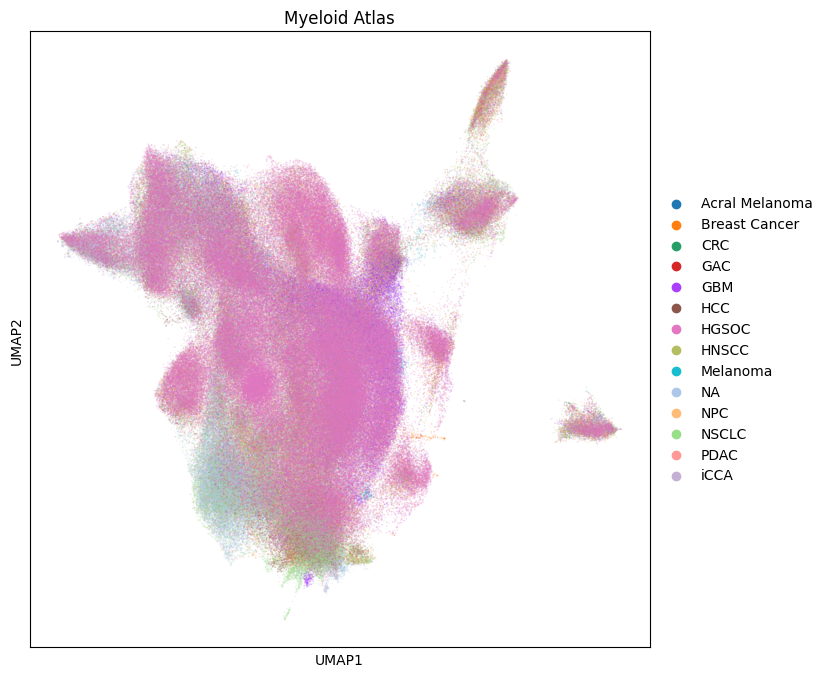

In [9]:
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color="cancer_type_broad", size=5, title="Myeloid Atlas", alpha=0.2)

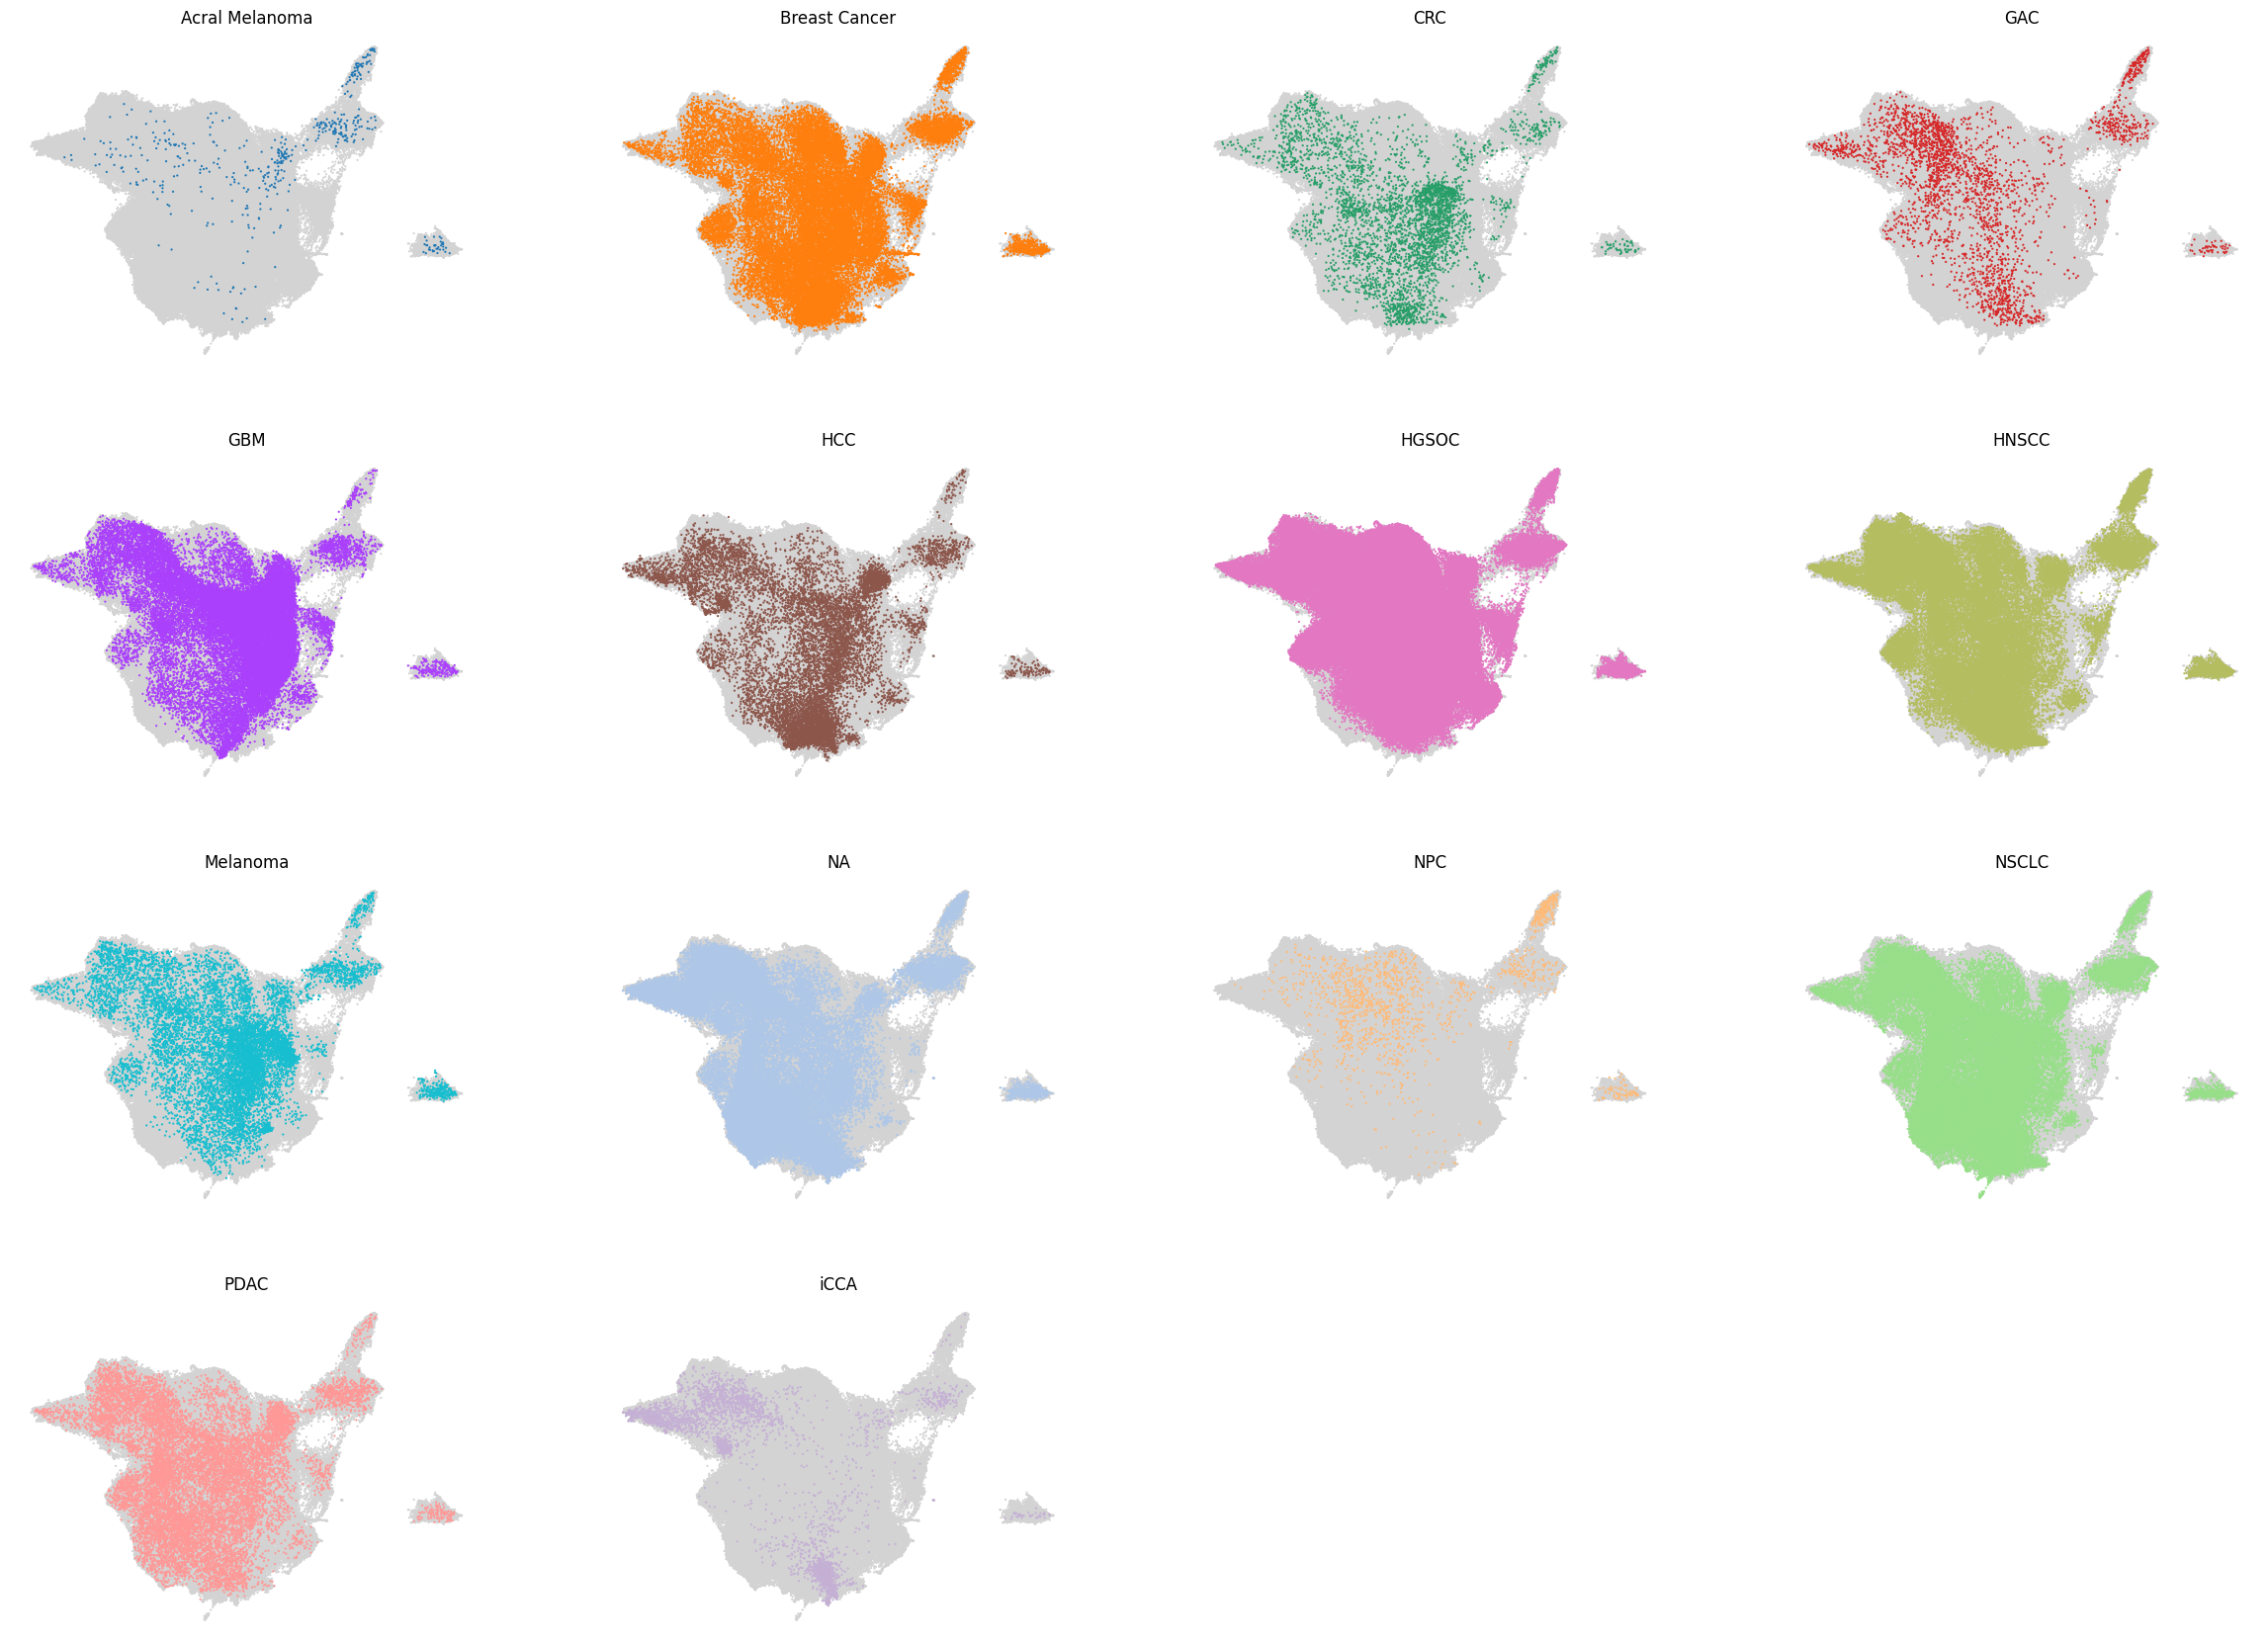

In [10]:
cluster_small_multiples(data, "cancer_type_broad")

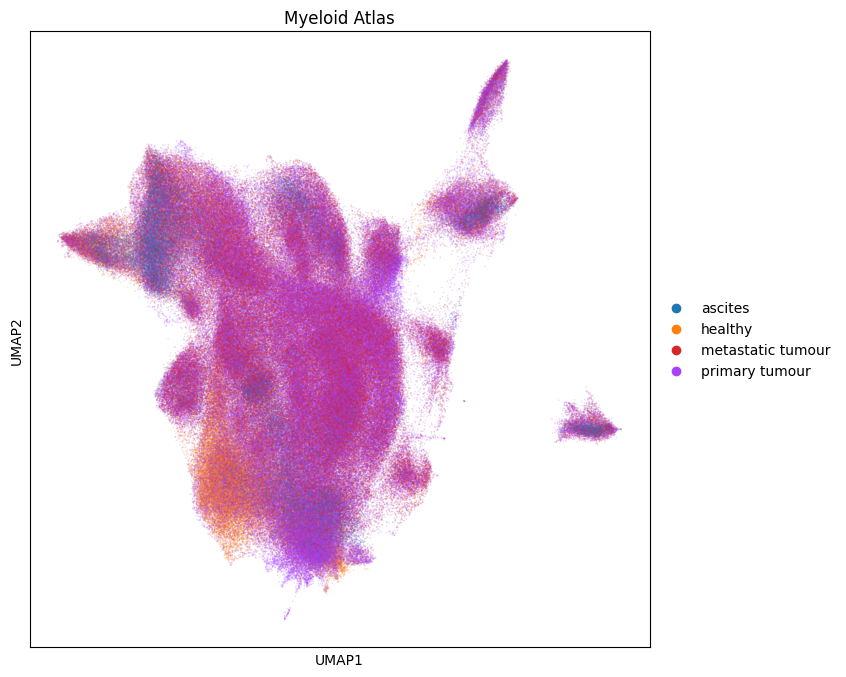

In [11]:
with plt.rc_context({"figure.figsize": (8, 8)}):
    sc.pl.umap(data, color="sample_type_major2", size=5, title="Myeloid Atlas", alpha=0.2)

In [19]:
cluster_small_multiples(data, "sample_type_major2")

# summarise sites for mets:

In [7]:
data_mets = data[data.obs["sample_type_major2"] == "metastatic tumour"]

In [13]:
cancer_type_broad_sites = {}

# Get unique values in `cancer_type_broad`
unique_cancer_types = data_mets.obs['cancer_type_broad'].unique()

# For each unique cancer type, get the unique `site` values
for cancer_type in unique_cancer_types:
    sites = data_mets.obs.loc[data_mets.obs['cancer_type_broad'] == cancer_type, 'site'].unique()
    cancer_type_broad_sites[cancer_type] = sites

# Convert the dictionary into a pandas DataFrame for export
df = pd.DataFrame([
    {"Cancer Type": cancer_type, "Sites": ", ".join(sites)}
    for cancer_type, sites in cancer_type_broad_sites.items()
])

# Export the DataFrame to an Excel file
output_path = "cancer_type_sites.xlsx"
df.to_excel(output_path, index=False)

In [12]:
df

Cancer Type                                              Sites
0       Melanoma                                  lymph node, brain
1          HNSCC              skin, pleura, lung, liver, lymph node
2          HGSOC  omentum, bowel, upper abdomen, peritoneum, lym...
3  Breast Cancer                                         lymph node
4          NSCLC                                  brain, lymph node
5            GAC                                       liver, ovary
6           PDAC                                liver, lung, vagina
7            CRC                                         peritoneum

# Plot DC proportions as box plots

In [7]:
#make an object for just primary and metastatic tumours
data_primary = data[data.obs["sample_type_major2"] == "primary tumour"]
data_mets = data[data.obs["sample_type_major2"] == "metastatic tumour"]
data_H = data[data.obs["sample_type_major2"] == "healthy"]
data_OC = data[data.obs["cancer_with_H"] == "HGSOC"]

## Primary tumour:

### Calculate the proportion of each DC type per sample and cancer subtype: 

In [8]:
# Create a DataFrame containing just sample, subtype and annotations 
df = data_primary.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["NR_annotations_simple"] == "cDC1"
df["is_cDC2"] = df["NR_annotations_simple"] == "cDC2"
df["is_mregDC"] = df["NR_annotations_simple"] == "mregDC"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#now have a dataframe containing proportion of each DC type for every sample and cancer type
proportion_df.head(15)

/scratch/temp/11909541/ipykernel_1820536/2000647374.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


integration_id cancer_broadest  cDC1_proportion  cDC2_proportion  \
0   GGSE223063_GLIO_1              BC              NaN              NaN   
1   GGSE223063_GLIO_1             CRC              NaN              NaN   
2   GGSE223063_GLIO_1             GAC              NaN              NaN   
3   GGSE223063_GLIO_1             GBM          0.00749         0.009814   
4   GGSE223063_GLIO_1             HCC              NaN              NaN   
5   GGSE223063_GLIO_1           HGSOC              NaN              NaN   
6   GGSE223063_GLIO_1           HNSCC              NaN              NaN   
7   GGSE223063_GLIO_1             MEL              NaN              NaN   
8   GGSE223063_GLIO_1             NPC              NaN              NaN   
9   GGSE223063_GLIO_1           NSCLC              NaN              NaN   
10  GGSE223063_GLIO_1            PDAC              NaN              NaN   
11  GGSE223063_GLIO_1            iCCA              NaN              NaN   
12  GGSE223063_GLIO_2              BC              NaN              NaN   
13  GGSE223063_GLIO_2             CRC              NaN              NaN   
14  GGSE223063_GLIO_2             GAC              NaN              NaN   

    mregDC_proportion  
0                 NaN  
1                 NaN  
2                 NaN  
3            0.002841  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8                 NaN  
9                 NaN  
10                NaN  
11                NaN  
12                NaN  
13                NaN  
14                NaN

In [9]:
# Melt the DataFrame to "long" format for seaborn plotting
proportion_df_long = proportion_df.melt(
    id_vars=["integration_id", "cancer_broadest"], 
    value_vars=["cDC1_proportion", "cDC2_proportion", "mregDC_proportion"],
    var_name="Cell_Type",
    value_name="Proportion"
)

proportion_df_long.head(15)

integration_id cancer_broadest        Cell_Type  Proportion
0   GGSE223063_GLIO_1              BC  cDC1_proportion         NaN
1   GGSE223063_GLIO_1             CRC  cDC1_proportion         NaN
2   GGSE223063_GLIO_1             GAC  cDC1_proportion         NaN
3   GGSE223063_GLIO_1             GBM  cDC1_proportion     0.00749
4   GGSE223063_GLIO_1             HCC  cDC1_proportion         NaN
5   GGSE223063_GLIO_1           HGSOC  cDC1_proportion         NaN
6   GGSE223063_GLIO_1           HNSCC  cDC1_proportion         NaN
7   GGSE223063_GLIO_1             MEL  cDC1_proportion         NaN
8   GGSE223063_GLIO_1             NPC  cDC1_proportion         NaN
9   GGSE223063_GLIO_1           NSCLC  cDC1_proportion         NaN
10  GGSE223063_GLIO_1            PDAC  cDC1_proportion         NaN
11  GGSE223063_GLIO_1            iCCA  cDC1_proportion         NaN
12  GGSE223063_GLIO_2              BC  cDC1_proportion         NaN
13  GGSE223063_GLIO_2             CRC  cDC1_proportion         NaN
14  GGSE223063_GLIO_2             GAC  cDC1_proportion         NaN

In [10]:
#export proportion_df_long 
proportion_df_long.to_excel("2024-12-07_DC_prop_primary.xlsx", index=False)

## Repeat for Mets:

### Calculate the proportion of each DC type per sample and cancer subtype: 

In [11]:
# Create a DataFrame containing just sample, subtype and annotations 
df = data_mets.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["NR_annotations_simple"] == "cDC1"
df["is_cDC2"] = df["NR_annotations_simple"] == "cDC2"
df["is_mregDC"] = df["NR_annotations_simple"] == "mregDC"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#now have a dataframe containing proportion of each DC type for every sample and cancer type
proportion_df.head(15)

/scratch/temp/11909541/ipykernel_1820536/2907794242.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


integration_id cancer_broadest  cDC1_proportion  cDC2_proportion  \
0   GSE131907_LUAD_B3002              BC              NaN              NaN   
1   GSE131907_LUAD_B3002             CRC              NaN              NaN   
2   GSE131907_LUAD_B3002             GAC              NaN              NaN   
3   GSE131907_LUAD_B3002           HGSOC              NaN              NaN   
4   GSE131907_LUAD_B3002           HNSCC              NaN              NaN   
5   GSE131907_LUAD_B3002             MEL              NaN              NaN   
6   GSE131907_LUAD_B3002           NSCLC         0.002793         0.067039   
7   GSE131907_LUAD_B3002            PDAC              NaN              NaN   
8   GSE131907_LUAD_B3003              BC              NaN              NaN   
9   GSE131907_LUAD_B3003             CRC              NaN              NaN   
10  GSE131907_LUAD_B3003             GAC              NaN              NaN   
11  GSE131907_LUAD_B3003           HGSOC              NaN              NaN   
12  GSE131907_LUAD_B3003           HNSCC              NaN              NaN   
13  GSE131907_LUAD_B3003             MEL              NaN              NaN   
14  GSE131907_LUAD_B3003           NSCLC         0.000000         0.000000   

    mregDC_proportion  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6            0.001397  
7                 NaN  
8                 NaN  
9                 NaN  
10                NaN  
11                NaN  
12                NaN  
13                NaN  
14           0.010526

In [12]:
# Melt the DataFrame to "long" format for seaborn plotting
proportion_df_long = proportion_df.melt(
    id_vars=["integration_id", "cancer_broadest"], 
    value_vars=["cDC1_proportion", "cDC2_proportion", "mregDC_proportion"],
    var_name="Cell_Type",
    value_name="Proportion"
)

proportion_df_long.head(15)

integration_id cancer_broadest        Cell_Type  Proportion
0   GSE131907_LUAD_B3002              BC  cDC1_proportion         NaN
1   GSE131907_LUAD_B3002             CRC  cDC1_proportion         NaN
2   GSE131907_LUAD_B3002             GAC  cDC1_proportion         NaN
3   GSE131907_LUAD_B3002           HGSOC  cDC1_proportion         NaN
4   GSE131907_LUAD_B3002           HNSCC  cDC1_proportion         NaN
5   GSE131907_LUAD_B3002             MEL  cDC1_proportion         NaN
6   GSE131907_LUAD_B3002           NSCLC  cDC1_proportion    0.002793
7   GSE131907_LUAD_B3002            PDAC  cDC1_proportion         NaN
8   GSE131907_LUAD_B3003              BC  cDC1_proportion         NaN
9   GSE131907_LUAD_B3003             CRC  cDC1_proportion         NaN
10  GSE131907_LUAD_B3003             GAC  cDC1_proportion         NaN
11  GSE131907_LUAD_B3003           HGSOC  cDC1_proportion         NaN
12  GSE131907_LUAD_B3003           HNSCC  cDC1_proportion         NaN
13  GSE131907_LUAD_B3003             MEL  cDC1_proportion         NaN
14  GSE131907_LUAD_B3003           NSCLC  cDC1_proportion    0.000000

In [13]:
#export proportion_df_long 
proportion_df_long.to_excel("2024-12-07_DC_prop_mets.xlsx", index=False)

### Note: mets represents multiple sites

## Repeat for healthy:

### Calculate the proportion of each DC type per sample and site: 

In [14]:
# Create a DataFrame containing just sample, subtype and annotations 
df = data_H.obs[["integration_id", "site", "NR_annotations_simple"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["NR_annotations_simple"] == "cDC1"
df["is_cDC2"] = df["NR_annotations_simple"] == "cDC2"
df["is_mregDC"] = df["NR_annotations_simple"] == "mregDC"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "site"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#now have a dataframe containing proportion of each DC type for every sample and cancer type
proportion_df.head(15)

/scratch/temp/11909541/ipykernel_1820536/233535826.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


integration_id        site  cDC1_proportion  cDC2_proportion  \
0   GSE131907_Healthy_N0001      breast              NaN              NaN   
1   GSE131907_Healthy_N0001       colon              NaN              NaN   
2   GSE131907_Healthy_N0001       liver              NaN              NaN   
3   GSE131907_Healthy_N0001        lung         0.008306         0.041528   
4   GSE131907_Healthy_N0001  lymph node              NaN              NaN   
5   GSE131907_Healthy_N0001       ovary              NaN              NaN   
6   GSE131907_Healthy_N0006      breast              NaN              NaN   
7   GSE131907_Healthy_N0006       colon              NaN              NaN   
8   GSE131907_Healthy_N0006       liver              NaN              NaN   
9   GSE131907_Healthy_N0006        lung         0.004866         0.017032   
10  GSE131907_Healthy_N0006  lymph node              NaN              NaN   
11  GSE131907_Healthy_N0006       ovary              NaN              NaN   
12  GSE131907_Healthy_N0008      breast              NaN              NaN   
13  GSE131907_Healthy_N0008       colon              NaN              NaN   
14  GSE131907_Healthy_N0008       liver              NaN              NaN   

    mregDC_proportion  
0                 NaN  
1                 NaN  
2                 NaN  
3            0.009967  
4                 NaN  
5                 NaN  
6                 NaN  
7                 NaN  
8                 NaN  
9            0.005677  
10                NaN  
11                NaN  
12                NaN  
13                NaN  
14                NaN

In [15]:
# Melt the DataFrame to "long" format for seaborn plotting
proportion_df_long = proportion_df.melt(
    id_vars=["integration_id", "site"], 
    value_vars=["cDC1_proportion", "cDC2_proportion", "mregDC_proportion"],
    var_name="Cell_Type",
    value_name="Proportion"
)

proportion_df_long.head(15)

integration_id        site        Cell_Type  Proportion
0   GSE131907_Healthy_N0001      breast  cDC1_proportion         NaN
1   GSE131907_Healthy_N0001       colon  cDC1_proportion         NaN
2   GSE131907_Healthy_N0001       liver  cDC1_proportion         NaN
3   GSE131907_Healthy_N0001        lung  cDC1_proportion    0.008306
4   GSE131907_Healthy_N0001  lymph node  cDC1_proportion         NaN
5   GSE131907_Healthy_N0001       ovary  cDC1_proportion         NaN
6   GSE131907_Healthy_N0006      breast  cDC1_proportion         NaN
7   GSE131907_Healthy_N0006       colon  cDC1_proportion         NaN
8   GSE131907_Healthy_N0006       liver  cDC1_proportion         NaN
9   GSE131907_Healthy_N0006        lung  cDC1_proportion    0.004866
10  GSE131907_Healthy_N0006  lymph node  cDC1_proportion         NaN
11  GSE131907_Healthy_N0006       ovary  cDC1_proportion         NaN
12  GSE131907_Healthy_N0008      breast  cDC1_proportion         NaN
13  GSE131907_Healthy_N0008       colon  cDC1_proportion         NaN
14  GSE131907_Healthy_N0008       liver  cDC1_proportion         NaN

In [16]:
#export proportion_df_long 
proportion_df_long.to_excel("2024-12-07_DC_prop_healthy.xlsx", index=False)

## Plot DC proportions specifically for OC

### Calculate the proportion of each DC type per sample and sample type: 

In [17]:
# Create a DataFrame containing just sample, sample_type and annotations 
df = data_OC.obs[["integration_id", "sample_type_major2", "NR_annotations_simple"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["NR_annotations_simple"] == "cDC1"
df["is_cDC2"] = df["NR_annotations_simple"] == "cDC2"
df["is_mregDC"] = df["NR_annotations_simple"] == "mregDC"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "sample_type_major2"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#now have a dataframe containing proportion of each DC type for every sample and cancer type
proportion_df.head(15)

/scratch/temp/11909541/ipykernel_1820536/3277235809.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


integration_id sample_type_major2  \
0   GSE180661_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_...            ascites   
1   GSE180661_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_...            healthy   
2   GSE180661_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_...  metastatic tumour   
3   GSE180661_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_...     primary tumour   
4      GSE180661_SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY            ascites   
5      GSE180661_SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY            healthy   
6      GSE180661_SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY  metastatic tumour   
7      GSE180661_SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY     primary tumour   
8   GSE180661_SPECTRUM-OV-003_S1_UNSORTED_INFRACOL...            ascites   
9   GSE180661_SPECTRUM-OV-003_S1_UNSORTED_INFRACOL...            healthy   
10  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_INFRACOL...  metastatic tumour   
11  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_INFRACOL...     primary tumour   
12  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_LEFT_ADNEXA            ascites   
13  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_LEFT_ADNEXA            healthy   
14  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_LEFT_ADNEXA  metastatic tumour   

    cDC1_proportion  cDC2_proportion  mregDC_proportion  
0               NaN              NaN                NaN  
1               NaN              NaN                NaN  
2          0.000000         0.040816           0.006803  
3               NaN              NaN                NaN  
4               NaN              NaN                NaN  
5               NaN              NaN                NaN  
6               NaN              NaN                NaN  
7          0.003945         0.031558           0.001972  
8               NaN              NaN                NaN  
9               NaN              NaN                NaN  
10         0.014315         0.005112           0.003067  
11              NaN              NaN                NaN  
12              NaN              NaN                NaN  
13              NaN              NaN                NaN  
14              NaN              NaN                NaN

In [18]:
# Melt the DataFrame to "long" format for seaborn plotting
proportion_df_long = proportion_df.melt(
    id_vars=["integration_id", "sample_type_major2"], 
    value_vars=["cDC1_proportion", "cDC2_proportion", "mregDC_proportion"],
    var_name="Cell_Type",
    value_name="Proportion"
)

proportion_df_long.head(15)

integration_id sample_type_major2  \
0   GSE180661_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_...            ascites   
1   GSE180661_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_...            healthy   
2   GSE180661_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_...  metastatic tumour   
3   GSE180661_SPECTRUM-OV-002_S1_CD45P_INFRACOLIC_...     primary tumour   
4      GSE180661_SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY            ascites   
5      GSE180661_SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY            healthy   
6      GSE180661_SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY  metastatic tumour   
7      GSE180661_SPECTRUM-OV-002_S1_CD45P_RIGHT_OVARY     primary tumour   
8   GSE180661_SPECTRUM-OV-003_S1_UNSORTED_INFRACOL...            ascites   
9   GSE180661_SPECTRUM-OV-003_S1_UNSORTED_INFRACOL...            healthy   
10  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_INFRACOL...  metastatic tumour   
11  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_INFRACOL...     primary tumour   
12  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_LEFT_ADNEXA            ascites   
13  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_LEFT_ADNEXA            healthy   
14  GSE180661_SPECTRUM-OV-003_S1_UNSORTED_LEFT_ADNEXA  metastatic tumour   

          Cell_Type  Proportion  
0   cDC1_proportion         NaN  
1   cDC1_proportion         NaN  
2   cDC1_proportion    0.000000  
3   cDC1_proportion         NaN  
4   cDC1_proportion         NaN  
5   cDC1_proportion         NaN  
6   cDC1_proportion         NaN  
7   cDC1_proportion    0.003945  
8   cDC1_proportion         NaN  
9   cDC1_proportion         NaN  
10  cDC1_proportion    0.014315  
11  cDC1_proportion         NaN  
12  cDC1_proportion         NaN  
13  cDC1_proportion         NaN  
14  cDC1_proportion         NaN

In [19]:
#export proportion_df_long 
proportion_df_long.to_excel("2024-12-07_DC_prop_OC.xlsx", index=False)

# overlay select gene sets on UMAP
* to support annotations
* note: not all genes present in gene sets are in my atlas

In [7]:
#define DC subset gene sets from Villani et al 
DC1_sig = ['CLEC9A','C1ORF54','HLA-DPA1','CADM1','CAMK2D','CPVL','HLA-DPB2','WDFY4','CPNE3','IDO1','HLA-DPB1','LOC645638','HLA-DOB','HLA-DQB1','HLA-DQB','CLNK','CSRP1','SNX3','ZNF366','KIAA1598','NDRG2','ENPP1','RGS10','AX747832','CYB5R3','ID2','XCR1','FAM190A','ASAP1','SLAMF8','CD59','DHRS3','GCET2','FNBP1','TMEM14A','NET1','BTLA','BCL6','FLT3','ADAM28','SLAMF7','BATF3','LGALS2','VAC14','PPA1','APOL3','C1ORF21','CCND1','ANPEP','ELOVL5','NCALD','ACTN1','PIK3CB','HAVCR2','GYPC','TLR10','ASB2','KIF16B','LRRC18','DST','DENND1B','DNASE1L3','SLC24A4','VAV3','THBD','NAV1','GSTM4','TRERF1','B3GNT7','LACC1','LMNA','PTK2','IDO2','MTERFD3','CD93','DPP4','SLC9A9','FCRL6','PDLIM7','CYP2E1','PDE4DIP','LIMA1','CTTNBP2NL','PPM1M','OSBPL3','PLCD1','CD38','EHD4','ACSS2','LOC541471','FUCA1','SNX22','APOL1','DUSP10','FAM160A2','INF2','DUSP2','PALM2','RAB11FIP4','DSE','FAM135A','KCNK6','PPM1H','PAFAH1B3','PDLIM1','TGM2','SCARF1','CD40','STX3','WHAMMP3','PRELID2','PQLC2']
DC2_sig = ['CD1C','FCER1A','CLEC10A','ADAM8','CD1D','FCGR2B','CLEC4A','SLC2A3','CD33','ETS2','CLIC2','PEA15','CACNA2D3','CD1E','MBOAT7','C10ORF128','NR4A2','AGPAT9','ENTPD1','CD2','PER1','PID1','AREG','PTGS1','SMA','CLEC17A','ITGA5','CREB5','PTAFR','NOD2','CCR6']
DC3_sig = ['S100A9','S100A8','VCAN','LYZ','ANXA1','PLBD1','RNASE2','FCER1A','SLC2A3','CD163','CSF3R','MNDA','CD14','NAIP','CSTA','FCN1','CD1D','FPR1','F13A1','CLEC10A','CES1','PID1','S100A12','MTMR11','SMA','LAT2','RETN','TMEM173','AOAH','RAB3D','CD36','MGST1','TREM1','HNMT','CES1P1','ADAM15','IL13RA1','MICAL2','ITGA5','CREB5','IL1B','NR4A2','MPP7','PTAFR','HBEGF','NFE2','ASGR1','BST1','IL1RN','NOD2','NLRP3','DQ575504','LMNA','C9ORF89','IL27RA','NLRP12','RAB27A','EREG','LOC284454']

#mregDC sig from Merad
mregDC_sig = ['CD40','CD80','CD86','RELB','CD83','CD274','PDCD1LG2','CD200','FAS','ALDH1A2','SOCS1','SOCS2','CCR7','MYO1G','CXCL16','ADAM8','ICAM1','FSCN1','MARCKS','MARCKSL1','IL4RA','IL4I1','CCL17','CCL22','TNFRSF4','STAT6','BCL2L1']

In [8]:
# Define dictionary of gene sets
gene_sets = {
    "DC1_sig": DC1_sig,
    "DC2_sig": DC2_sig,
    "DC3_sig": DC3_sig,
    "mregDC_sig": mregDC_sig,
}

In [9]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data, genes, score_name=name)

       'FAM190A', 'GCET2', 'C1ORF21', 'LRRC18', 'MTERFD3', 'LOC541471',
       'PALM2', 'WHAMMP3', 'PQLC2'],
      dtype='object')


In [35]:
colour_vars = ["DC1_sig","DC2_sig","DC3_sig","mregDC_sig","MyeloidAPC_Subsets"]

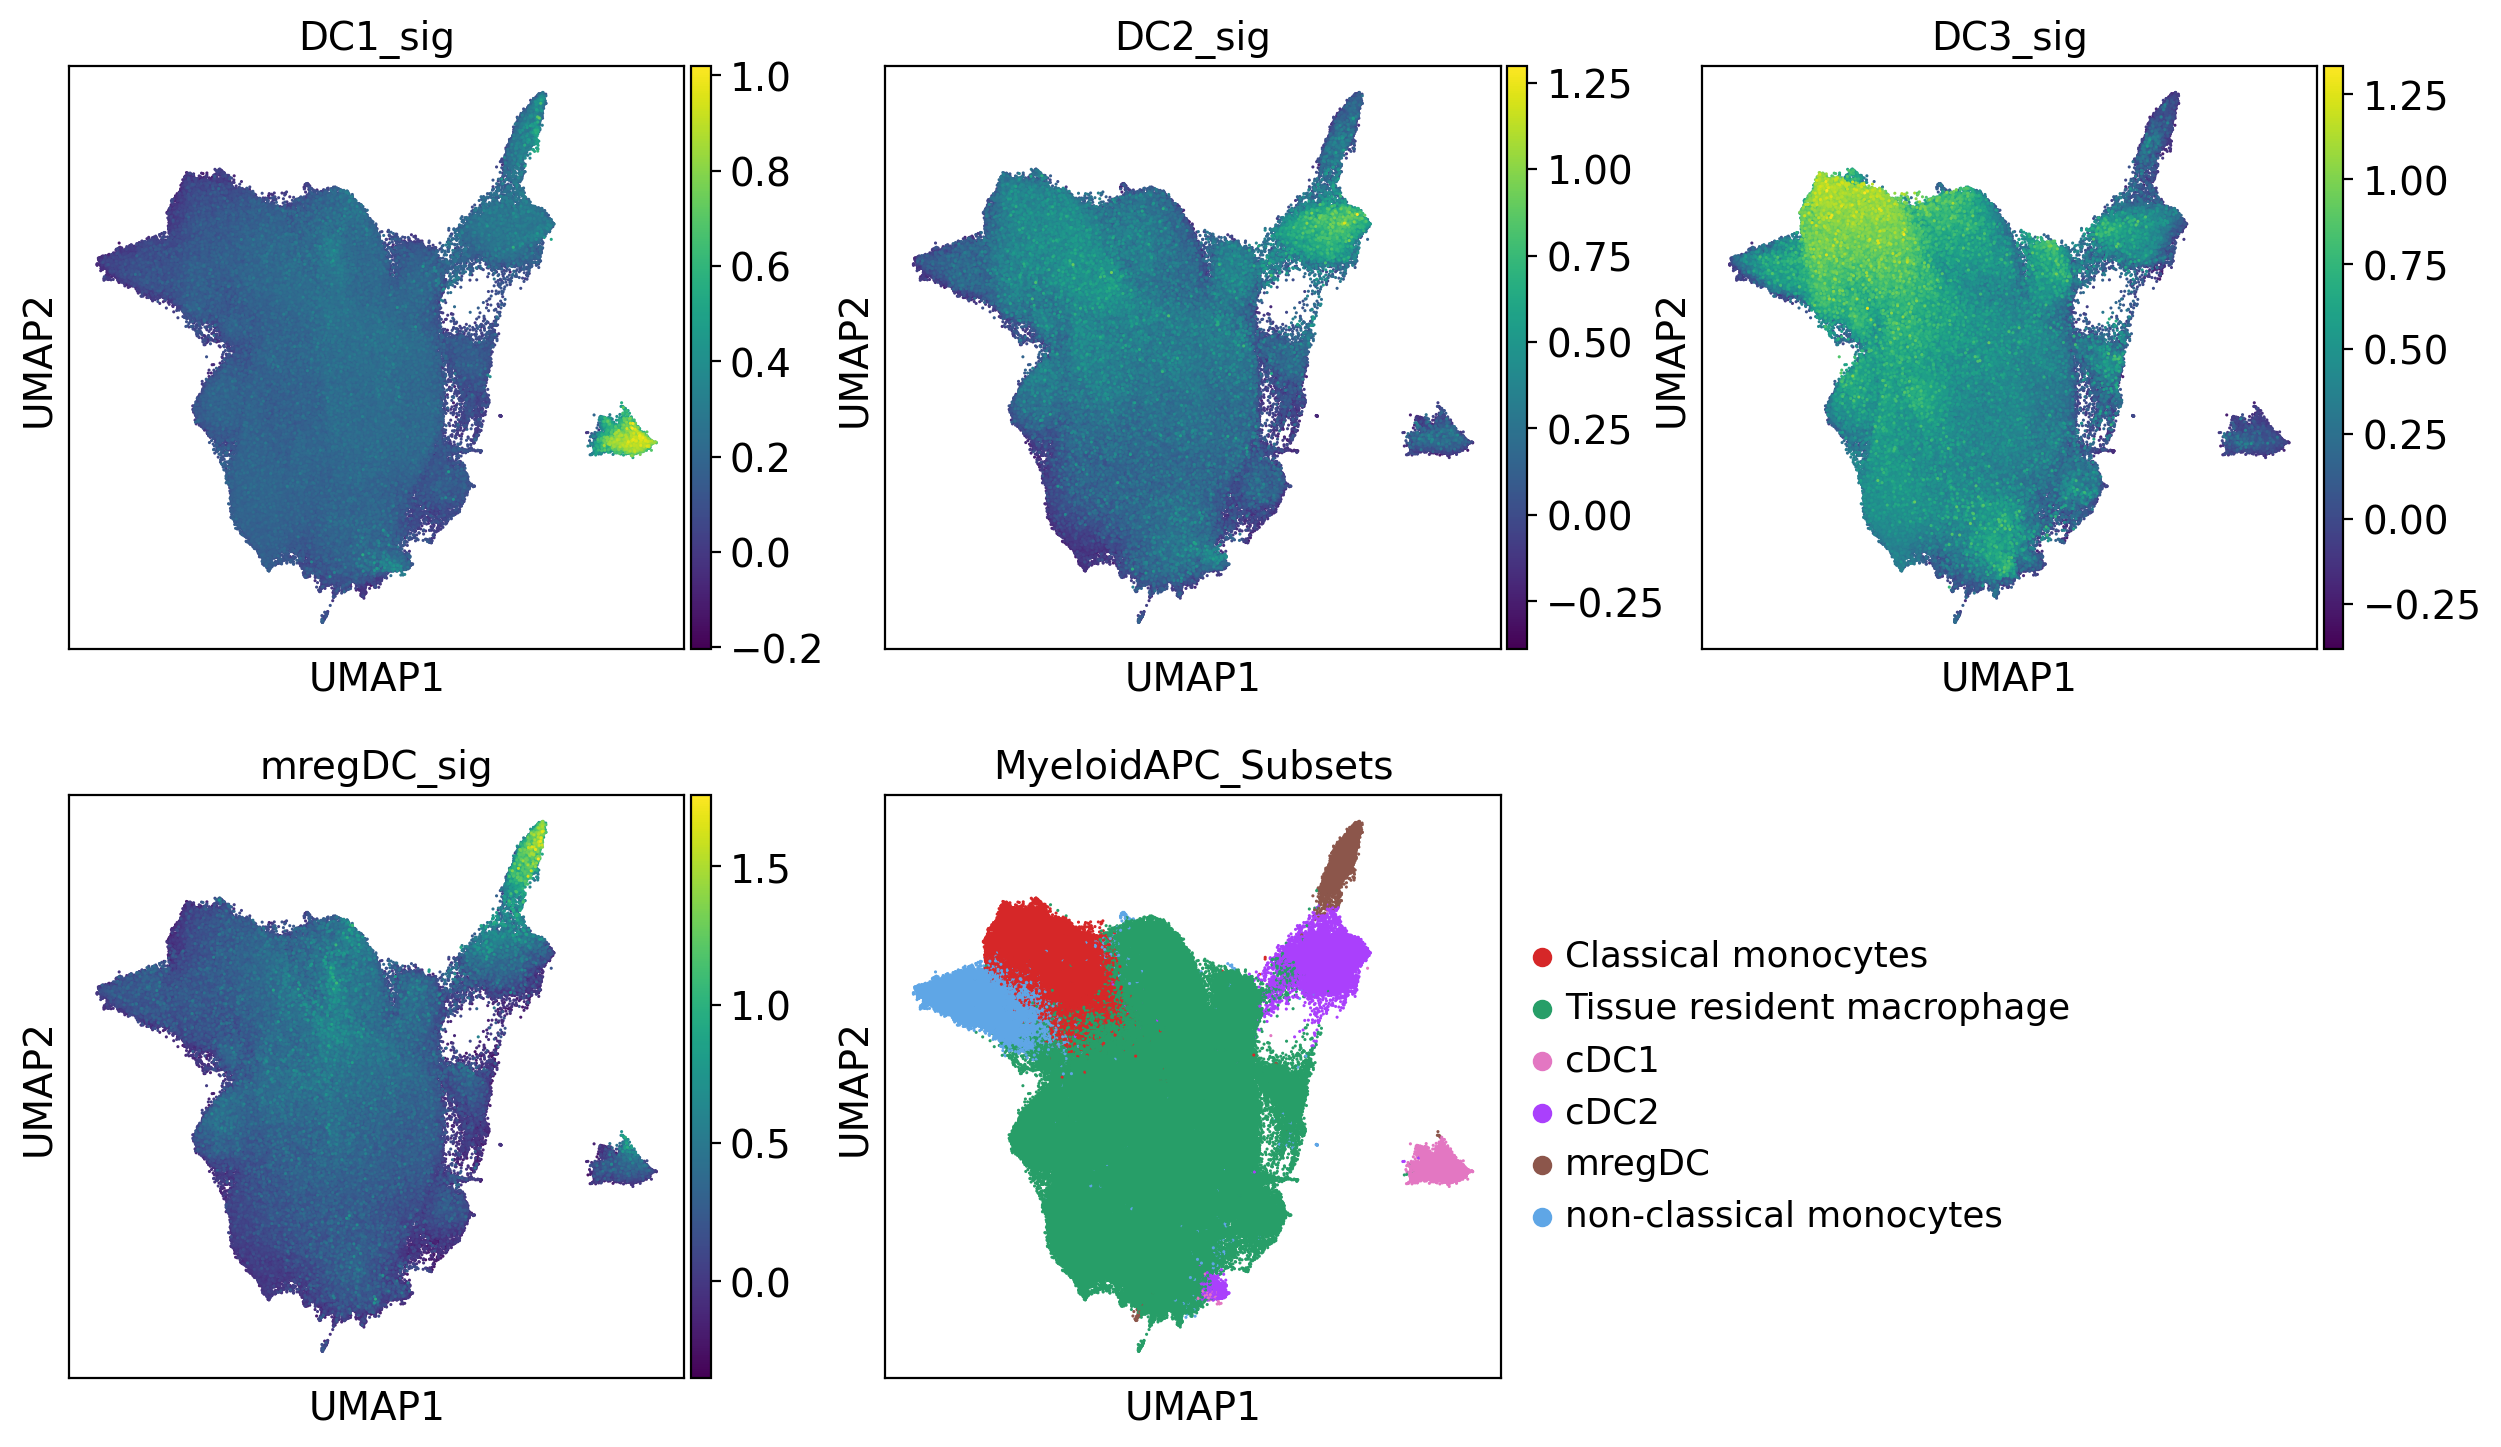

In [36]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=colour_vars, ncols=3, size=5)

# Overlaying Published Signatures for manuscript figures:

In [10]:
Villani_DC3 = ['S100A9','S100A8','VCAN','LYZ','ANXA1','PLBD1','RNASE2','FCER1A','SLC2A3','CD163','CSF3R','MNDA','CD14','NAIP','CSTA','FCN1','CD1D','FPR1','F13A1','CLEC10A','CES1','PID1','S100A12','MTMR11','SMA','LAT2','RETN','TMEM173','AOAH','RAB3D','CD36','MGST1','TREM1','HNMT','CES1P1','ADAM15','IL13RA1','MICAL2','ITGA5','CREB5','IL1B','NR4A2','MPP7','PTAFR','HBEGF','NFE2','ASGR1','BST1','IL1RN','NOD2','NLRP3','DQ575504','LMNA','C9ORF89','IL27RA','NLRP12','RAB27A','EREG','LOC284454']

Guimaraes_DC3_CD14 = ['CD14', 'S100A9', 'S100A8', 'VCAN', 'LYZ','ANXA1']
Guimaraes_DC4_FCGR3A = ['FCGR3A', 'FTL', 'SERPINA1']

Cheng_DC2_IL1B = ['IL1B','TNF','CCL3','CCL4']
Cheng_DC2_FCN1 = ['CD163', 'CD14', 'FCN1','S100A9','S100A8']


In [11]:
gene_sets_all = {
    "Villani_DC3_sig": Villani_DC3,
    "Guimaraes_DC3_CD14_sig": Guimaraes_DC3_CD14,
    "Guimaraes_DC4_FCGR3A_sig": Guimaraes_DC4_FCGR3A,
    "Cheng_DC2_IL1B_sig": Cheng_DC2_IL1B,
    "Cheng_DC2_FCN1_sig": Cheng_DC2_FCN1
}

In [12]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets_all.items():
    sc.tl.score_genes(data, genes, score_name=name)

In [46]:
colour_vars = ["Villani_DC3_sig","Guimaraes_DC3_CD14_sig","Guimaraes_DC4_FCGR3A_sig","Cheng_DC2_IL1B_sig","Cheng_DC2_FCN1_sig","MyeloidAPC_Subsets"]

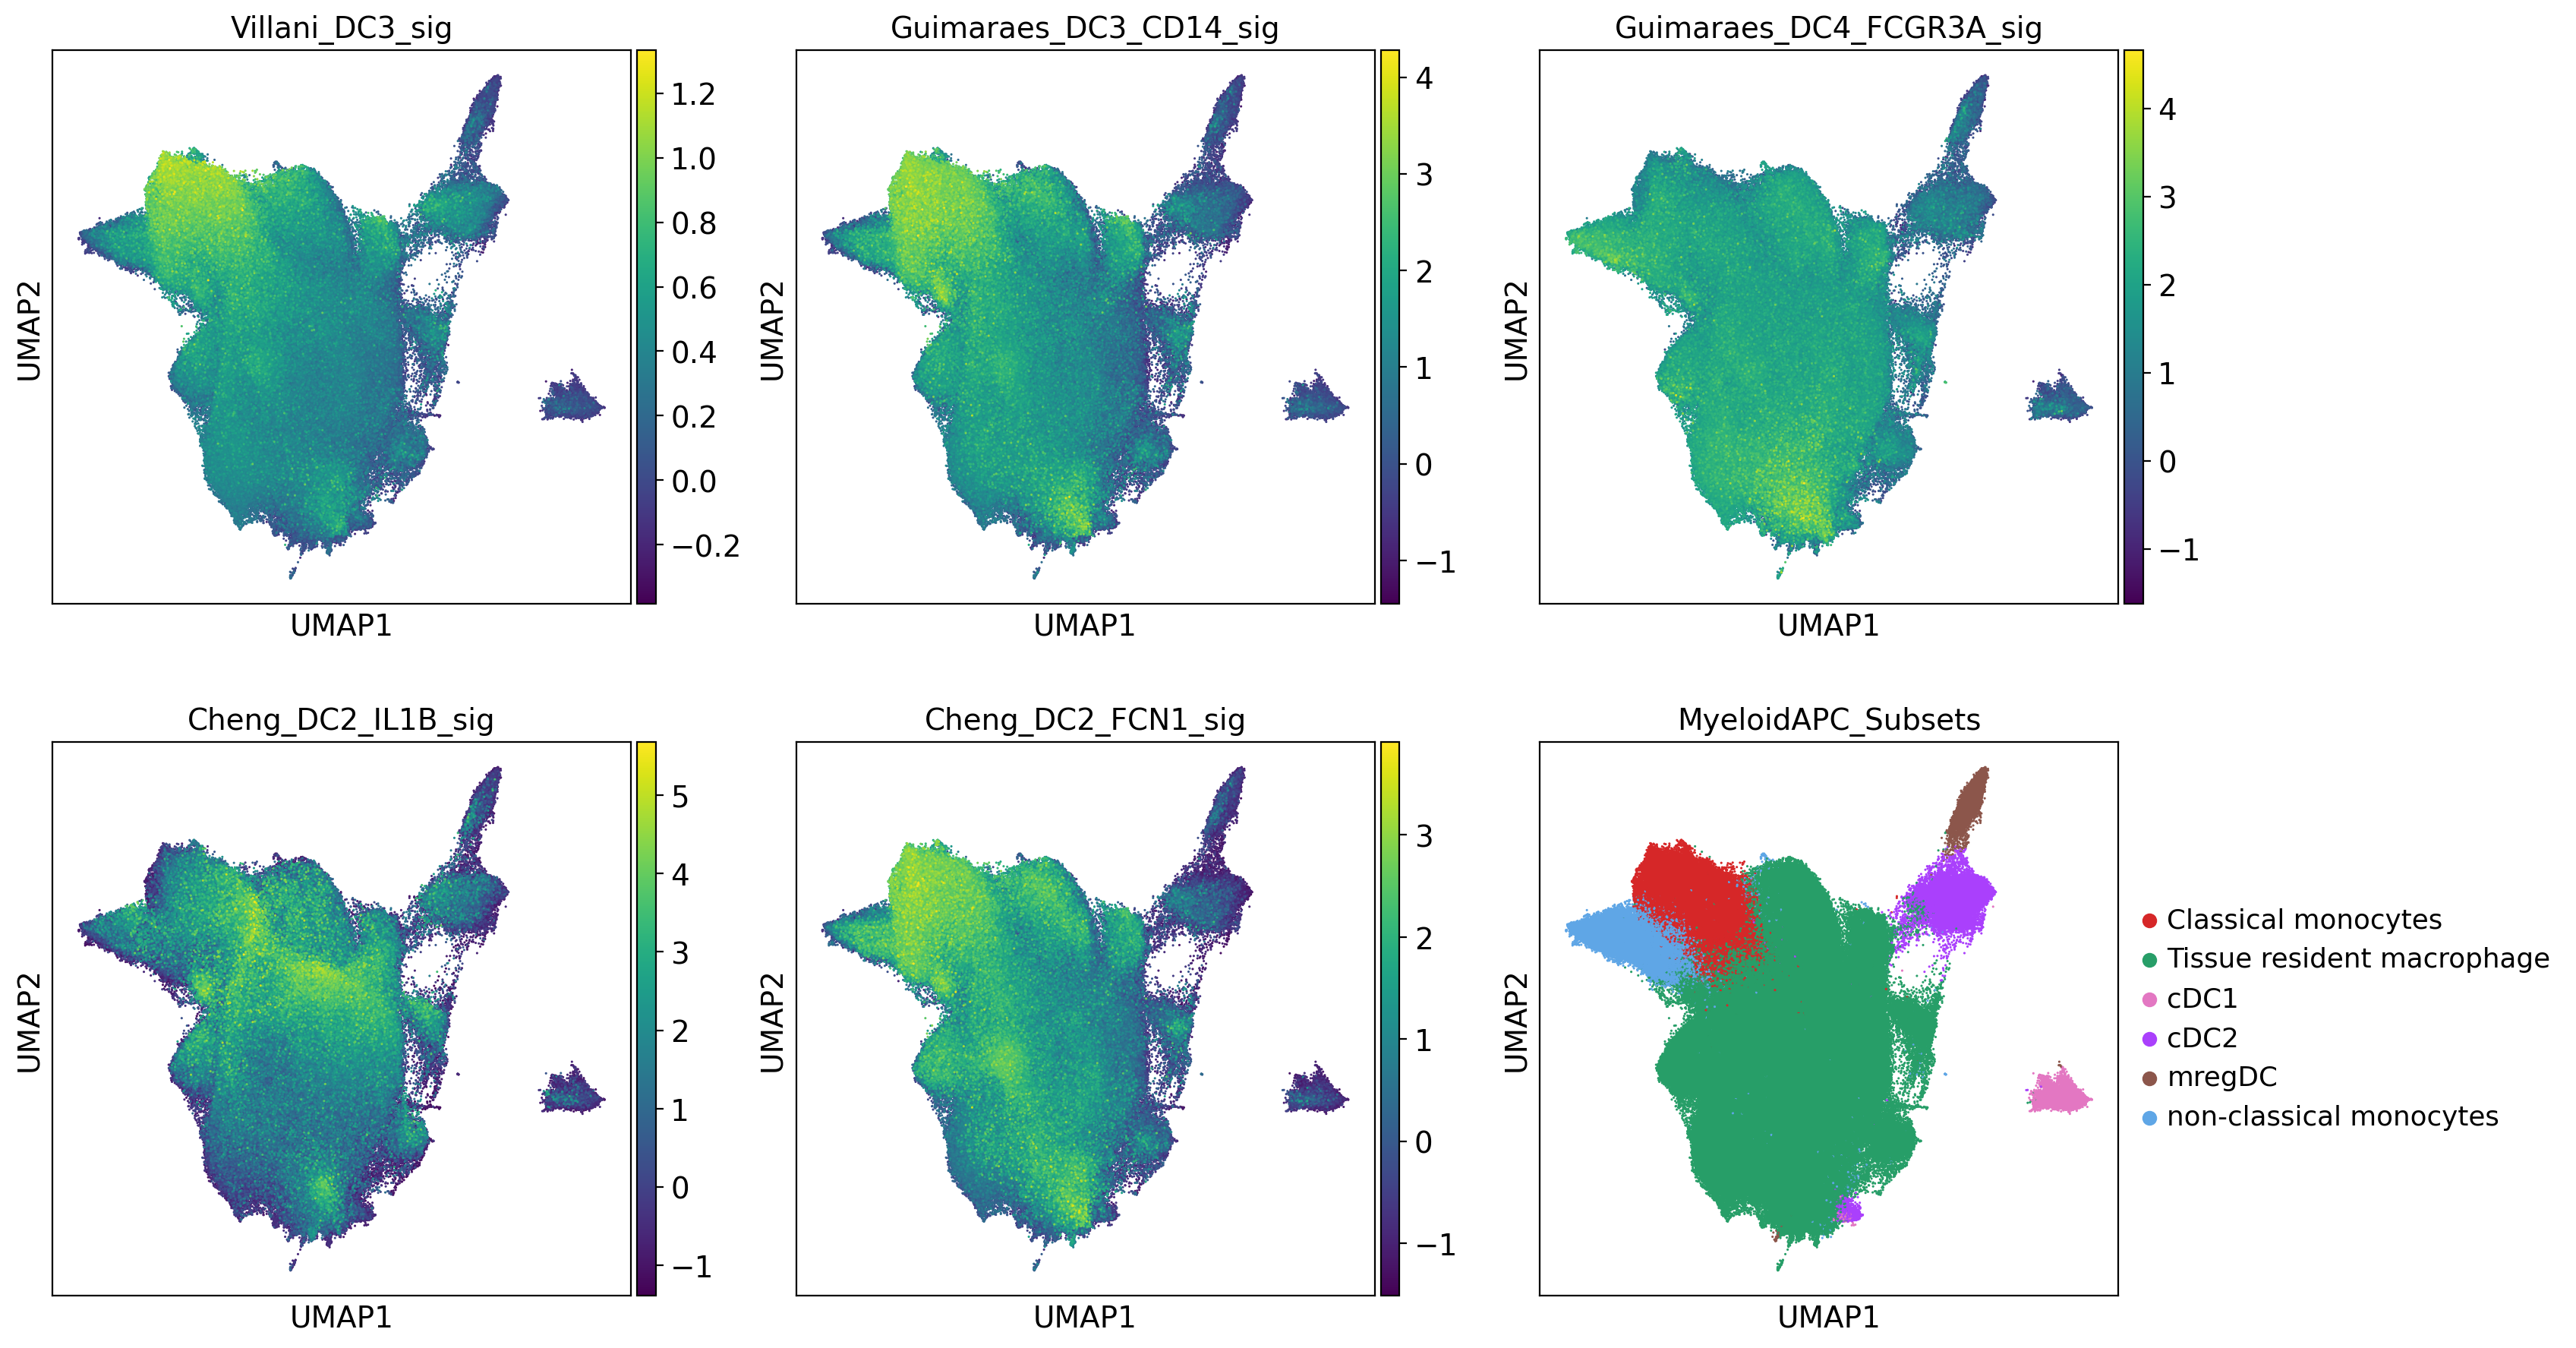

In [51]:
# plot:
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color=colour_vars, ncols=3, size=5, save="_NR_APC_Atlas_UMAPs_all.pdf")

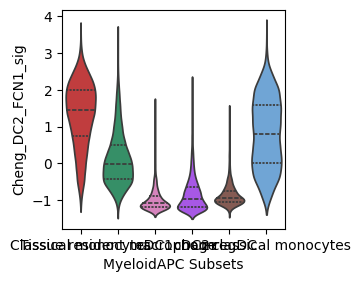

In [25]:
with plt.rc_context({"figure.figsize": (3.5, 3)}):
    for gene in gene_sets_all.keys():
        sc.pl.violin(
            data,
            keys=gene,
            groupby='MyeloidAPC_Subsets',
            stripplot=False,
            inner='quartiles',
            show=True,  
            save=f"_sig_overlay_AllAtlas_{gene}.pdf"
        )

In [ ]:
gene_sets_all = {
    "Villani_DC3_sig": Villani_DC3,
    "Guimaraes_DC3_CD14_sig": Guimaraes_DC3_CD14,
    "Guimaraes_DC4_FCGR3A_sig": Guimaraes_DC4_FCGR3A,
    "Cheng_DC2_IL1B_sig": Cheng_DC2_IL1B,
    "Cheng_DC2_FCN1_sig": Cheng_DC2_FCN1
}

### Export the data for above violin plots to do stats in prism

In [26]:
for score_name in gene_sets_all.keys():
    # Extract columns 
    score_df = data.obs[[
        score_name,
        'MyeloidAPC_Subsets',
        'integration_id'
    ]].copy()
    
    # Save to CSV with the score name in the filename
    score_df.to_csv(f"{score_name}_enrichment_AllAtlas.csv", index=True)

In [27]:
score_df.head()

Cheng_DC2_FCN1_sig  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1           -1.245989   
GSE215120_AM1_AAAGATGTCCAAATGC-1           -0.453992   
GSE215120_AM1_AAATGCCCAGAGCCAA-1           -1.068497   
GSE215120_AM1_ACACTGAAGATCCCGC-1            1.023767   
GSE215120_AM1_ACACTGATCCACTGGG-1           -0.577441   

                                          MyeloidAPC_Subsets  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1  Tissue resident macrophage   
GSE215120_AM1_AAAGATGTCCAAATGC-1  Tissue resident macrophage   
GSE215120_AM1_AAATGCCCAGAGCCAA-1                        cDC2   
GSE215120_AM1_ACACTGAAGATCCCGC-1         Classical monocytes   
GSE215120_AM1_ACACTGATCCACTGGG-1                        cDC2   

                                           integration_id  
GSE215120_AM1_AAACCTGGTTGCTCCT-1  GSE215120_Acral_MEL_AM1  
GSE215120_AM1_AAAGATGTCCAAATGC-1  GSE215120_Acral_MEL_AM1  
GSE215120_AM1_AAATGCCCAGAGCCAA-1  GSE215120_Acral_MEL_AM1  
GSE215120_AM1_ACACTGAAGATCCCGC-1  GSE215120_Acral_MEL_AM1  
GSE215120_AM1_ACACTGATCCACTGGG-1  GSE215120_Acral_MEL_AM1

# show canonical markers

In [28]:
fig_genes = {
    "cDC1": ["CLEC9A", "XCR1","BATF3","IRF8"],
    "cDC2": ["CD1C", "FCER1A", "CLEC10A"],
    "mregDC": ["LAMP3","CD274","CCR7"],
    "Mono": ["LYZ","S100A8","S100A9","CD14","FCGR3A"],
    "Mac": ["FCGR1A","CD68","CSF1R","TREM2","SPP1"],
    "Tissue Res.": ["C1QA","C1QB","C1QC"]
}

In [29]:
cat_order = ["cDC1","cDC2","mregDC","Classical monocytes","non-classical monocytes","Tissue resident macrophage"]

In [30]:
sc.pl.dotplot(data, fig_genes, groupby="MyeloidAPC_Subsets", standard_scale="var", categories_order=cat_order, save="_APC-Atlas-Annotation-markers-v3.pdf")

# atlas summary plots: number of samples/cells by cancer type, tissue type, site etc

In [31]:
# check 
counts = data.obs['cancer_broadest'].value_counts()
print(counts)

cancer_broadest
HGSOC    212070
NA        63409
NSCLC     54888
HNSCC     52659
GBM       34224
BC        31823
PDAC      14061
HCC       12019
MEL       11021
CRC        3879
iCCA       3466
GAC        2894
NPC        1610
Name: count, dtype: int64


In [5]:
data_count = data[~data.obs["cancer_with_H"].isin(["NA"])]

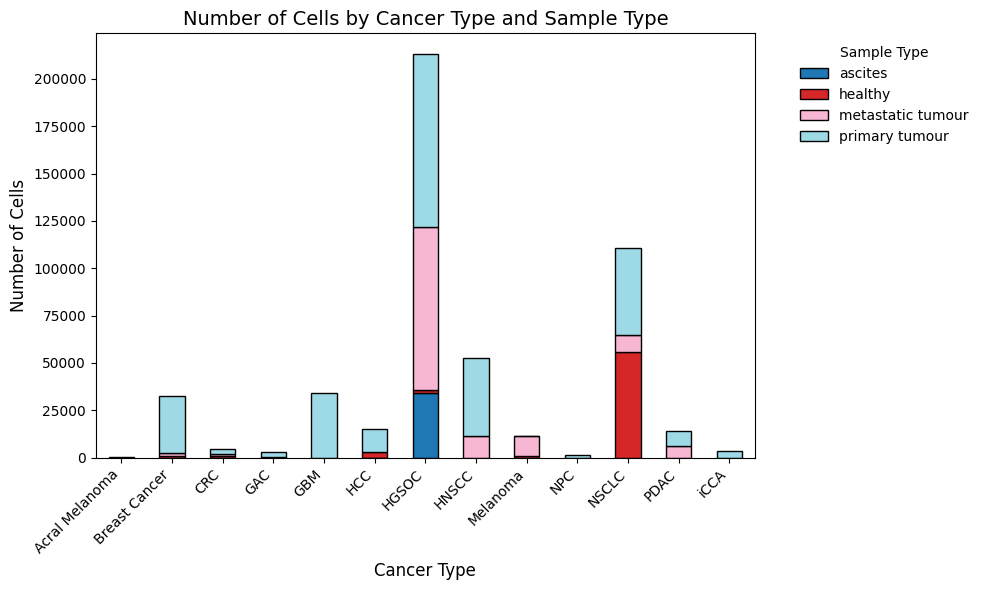

In [12]:
# Create a cross-tabulation of counts by cancer type and sample type
cell_counts = pd.crosstab(data_count.obs["cancer_with_H"], data_count.obs["sample_type_major2"])

# Plot a stacked bar chart
ax = cell_counts.plot.bar(stacked=True, figsize=(10, 6), colormap="tab20", edgecolor="black")
ax.set_title("Number of Cells by Cancer Type and Sample Type", fontsize=14)
ax.set_xlabel("Cancer Type", fontsize=12)
ax.set_ylabel("Number of Cells", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sample Type", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.tight_layout()
plt.show()

In [13]:
cell_counts.head()

sample_type_major2  ascites  healthy  metastatic tumour  primary tumour
cancer_with_H                                                          
Acral Melanoma            0        0                  0             479
Breast Cancer             0      807               1903           29920
CRC                       0      926               1101            2778
GAC                       0        0                477            2417
GBM                       0        0                  0           34224

In [14]:
cell_counts.to_csv("Atlas_Final_Summary_Cells.csv", index=True)

/scratch/temp/12237070/ipykernel_1220297/1043732579.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


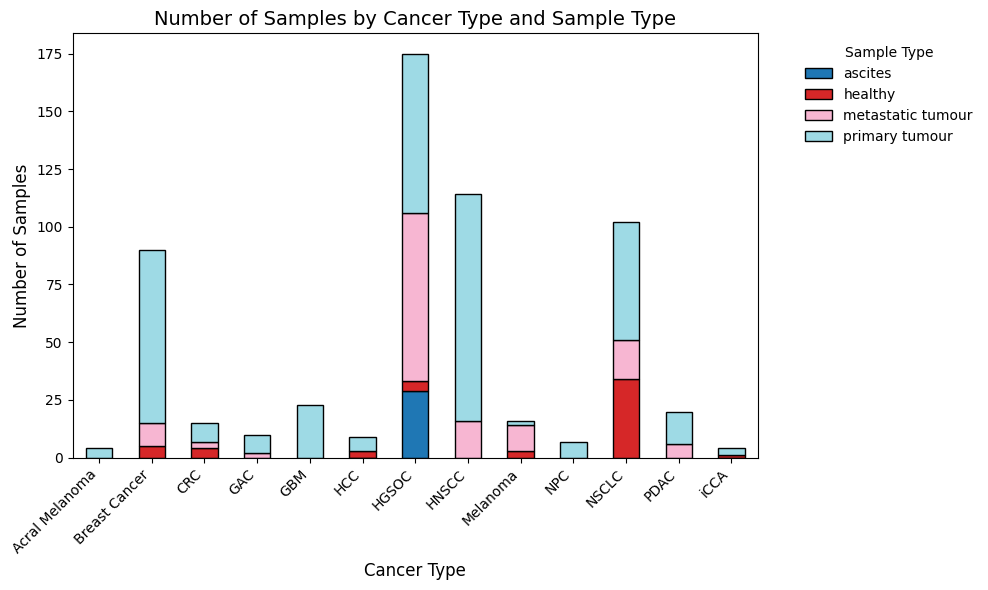

In [15]:
# Group by cancer_type_broad and sample_type, then count unique integration_ids
cell_counts = (
    data_count.obs.groupby(["cancer_with_H", "sample_type_major2"])["integration_id"]
    .nunique()
    .unstack(fill_value=0)  # Pivot to create a table format
)

# Plot a stacked bar chart
ax = cell_counts.plot.bar(stacked=True, figsize=(10, 6), colormap="tab20", edgecolor="black")
ax.set_title("Number of Samples by Cancer Type and Sample Type", fontsize=14)
ax.set_xlabel("Cancer Type", fontsize=12)
ax.set_ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sample Type", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.tight_layout()
plt.show()

In [16]:
cell_counts.head()

sample_type_major2  ascites  healthy  metastatic tumour  primary tumour
cancer_with_H                                                          
Acral Melanoma            0        0                  0               4
Breast Cancer             0        5                 10              75
CRC                       0        4                  3               8
GAC                       0        0                  2               8
GBM                       0        0                  0              23

In [17]:
cell_counts.to_csv("Atlas_Final_Summary_Samples.csv", index=True)

In [28]:
data.obs.head()

nCount_RNA  nFeature_RNA sample_type  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1     20298.0        3789.0      tumour   
GSE215120_AM1_AAAGATGTCCAAATGC-1      5574.0        1721.0      tumour   
GSE215120_AM1_AAATGCCCAGAGCCAA-1     17143.0        2659.0      tumour   
GSE215120_AM1_ACACTGAAGATCCCGC-1      5912.0        1374.0      tumour   
GSE215120_AM1_ACACTGATCCACTGGG-1     18333.0        2845.0      tumour   

                                     cancer_type patient_id  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1  Acral Melanoma        AM1   
GSE215120_AM1_AAAGATGTCCAAATGC-1  Acral Melanoma        AM1   
GSE215120_AM1_AAATGCCCAGAGCCAA-1  Acral Melanoma        AM1   
GSE215120_AM1_ACACTGAAGATCCCGC-1  Acral Melanoma        AM1   
GSE215120_AM1_ACACTGATCCACTGGG-1  Acral Melanoma        AM1   

                                                sample_id  percent.mt  site  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1  GSE215120_Acral_MEL_AM1    0.975466  skin   
GSE215120_AM1_AAAGATGTCCAAATGC-1  GSE215120_Acral_MEL_AM1    6.045928  skin   
GSE215120_AM1_AAATGCCCAGAGCCAA-1  GSE215120_Acral_MEL_AM1    1.224990  skin   
GSE215120_AM1_ACACTGAAGATCCCGC-1  GSE215120_Acral_MEL_AM1    2.503383  skin   
GSE215120_AM1_ACACTGATCCACTGGG-1  GSE215120_Acral_MEL_AM1    1.063656  skin   

                                 sample_type_major  cancer_subtype  ...  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1    primary tumour  Acral Melanoma  ...   
GSE215120_AM1_AAAGATGTCCAAATGC-1    primary tumour  Acral Melanoma  ...   
GSE215120_AM1_AAATGCCCAGAGCCAA-1    primary tumour  Acral Melanoma  ...   
GSE215120_AM1_ACACTGAAGATCCCGC-1    primary tumour  Acral Melanoma  ...   
GSE215120_AM1_ACACTGATCCACTGGG-1    primary tumour  Acral Melanoma  ...   

                                 DC_Axl_sig DC2_up_DC3 DC3_up_DC2  mregDC_sig  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1   0.063861   0.588479   0.082309    0.435951   
GSE215120_AM1_AAAGATGTCCAAATGC-1   0.094962   0.096703   0.189334    0.275931   
GSE215120_AM1_AAATGCCCAGAGCCAA-1   0.085564   0.494592   0.124530    0.427229   
GSE215120_AM1_ACACTGAAGATCCCGC-1   0.056393   0.002664   0.470527    0.223862   
GSE215120_AM1_ACACTGATCCACTGGG-1   0.083336   0.649041   0.226950    0.617883   

                                  cDC1_mregDC  cDC2_mregDC  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1     0.279165     0.553687   
GSE215120_AM1_AAAGATGTCCAAATGC-1     0.177009     0.444586   
GSE215120_AM1_AAATGCCCAGAGCCAA-1     0.259460     0.489422   
GSE215120_AM1_ACACTGAAGATCCCGC-1     0.230512     0.458001   
GSE215120_AM1_ACACTGATCCACTGGG-1     0.281696     0.620768   

                                              NR_annotations  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1  Tissue resident macrophage   
GSE215120_AM1_AAAGATGTCCAAATGC-1  Tissue resident macrophage   
GSE215120_AM1_AAATGCCCAGAGCCAA-1                        cDC2   
GSE215120_AM1_ACACTGAAGATCCCGC-1         Classical monocytes   
GSE215120_AM1_ACACTGATCCACTGGG-1                        cDC2   

                                       NR_annotations_simple  \
GSE215120_AM1_AAACCTGGTTGCTCCT-1  Tissue resident macrophage   
GSE215120_AM1_AAAGATGTCCAAATGC-1  Tissue resident macrophage   
GSE215120_AM1_AAATGCCCAGAGCCAA-1                        cDC2   
GSE215120_AM1_ACACTGAAGATCCCGC-1         Classical monocytes   
GSE215120_AM1_ACACTGATCCACTGGG-1                        cDC2   

                                  sample_type_major2   cancer_with_H  
GSE215120_AM1_AAACCTGGTTGCTCCT-1      primary tumour  Acral Melanoma  
GSE215120_AM1_AAAGATGTCCAAATGC-1      primary tumour  Acral Melanoma  
GSE215120_AM1_AAATGCCCAGAGCCAA-1      primary tumour  Acral Melanoma  
GSE215120_AM1_ACACTGAAGATCCCGC-1      primary tumour  Acral Melanoma  
GSE215120_AM1_ACACTGATCCACTGGG-1      primary tumour  Acral Melanoma  

[5 rows x 59 columns]

In [30]:
data.X.min(), data.X.max()

(-10.0, 10.0)

In [31]:
data.shape

(498023, 1268)

In [32]:
hasattr(data, "raw")

True

### Stats:

In [9]:
# total number of cells:
data.shape

(498023, 1268)

In [10]:
# total number of samples: 
data.obs["integration_id"].nunique()

589

# output number of samples per dataset per sample type

In [4]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

In [5]:
counts = data.obs['sample_type_major2'].value_counts()
print(counts)

sample_type_major2
primary tumour       273023
metastatic tumour    127339
healthy               63409
ascites               34252
Name: count, dtype: int64


In [7]:
# Group by dataset_id and sample_type, then count unique integration_ids
sample_counts = (
    data.obs.groupby(["dataset_id", "sample_type_major2"])["integration_id"]
    .nunique()
    .unstack(fill_value=0)  # Pivot to create a table format
)

/scratch/temp/12362819/ipykernel_2981227/3329902774.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [9]:
sample_counts

sample_type_major2  ascites  healthy  metastatic tumour  primary tumour
dataset_id                                                             
GSE112271                 0        0                  0               2
GSE131907                 0       11                 17              15
GSE139324                 0        0                  0              22
GSE154778                 0        0                  0               3
GSE154826                 0       21                  0              25
GSE156405                 0        0                  3               3
GSE161529                 0        4                  3              27
GSE162025                 0        0                  0               7
GSE162498                 0        2                  0              11
GSE164690                 0        0                  0              18
GSE167297                 0        0                  0               5
GSE173468                 0        0                  0              14
GSE176078                 0        0                  0              22
GSE180661                20        0                 69              45
GSE183916                 0        0                  3               1
GSE184880                 0        4                  0               7
GSE188737                 0        0                  5               6
GSE189903                 0        4                  0               7
GSE195861                 0        1                  5               9
GSE197177                 0        0                  3               3
GSE199515                 0        0                  0               2
GSE200218                 0        0                  5               0
GSE213243                 1        0                  0               1
GSE214295                 0        0                  0               3
GSE215120                 0        0                  1               6
GSE217517                 0        0                  0               7
GSE223063                 0        0                  0               3
GSE224090                 0        0                  0               2
GSE225600                 0        0                  2               3
GSE231535                 0        0                  0               2
GSE234129                 0        0                  2               3
GSE234933                 0        0                 11              38
GSE235676                 0        0                  0              18
PMID32561858              0        4                  0              19
PRJCA005422               8        0                  4               9
PRJNA907381               0        3                  5               0

In [10]:
# make object for each sample type
data_PMID = data[data.obs["dataset_id"] == "PMID32561858"]
data_189 = data[data.obs["dataset_id"] == "GSE189903"]


In [13]:
# Group by cancer type and sample_type, then count unique integration_ids
PMID_counts = (
    data_PMID.obs.groupby(["cancer_with_H", "sample_type_major2"])["integration_id"]
    .nunique()
    .unstack(fill_value=0)  # Pivot to create a table format
)

d189_counts = (
    data_189.obs.groupby(["cancer_with_H", "sample_type_major2"])["integration_id"]
    .nunique()
    .unstack(fill_value=0)  # Pivot to create a table format
)

/scratch/temp/12362819/ipykernel_2981227/2763046487.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/scratch/temp/12362819/ipykernel_2981227/2763046487.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [14]:
PMID_counts

sample_type_major2  healthy  primary tumour
cancer_with_H                              
Breast Cancer             0              12
CRC                       4               7

In [15]:
d189_counts

sample_type_major2  healthy  primary tumour
cancer_with_H                              
HCC                       3               4
iCCA                      1               3